In [42]:
import pandas as pd
from scipy.stats import mannwhitneyu, ttest_ind, kstest
import matplotlib.pyplot as plt




In [43]:
df = pd.read_csv('AB_test_result_cookie_cats 2.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [45]:
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [46]:
new_df = df[df['sum_gamerounds']>0]
new_df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1
...,...,...,...,...,...
90184,9999441,gate_40,97,1,0
90185,9999479,gate_40,30,0,0
90186,9999710,gate_30,28,1,0
90187,9999768,gate_40,51,1,0


In [47]:
new_df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,8.619500e+04,86195.00000,86195.000000,86195.000000
mean,4.997584e+06,54.27606,0.464830,0.194350
std,2.883574e+06,199.19155,0.498764,0.395702
min,1.160000e+02,1.00000,0.000000,0.000000
25%,2.513084e+06,6.00000,0.000000,0.000000
50%,4.995751e+06,18.00000,0.000000,0.000000
75%,7.495044e+06,54.00000,1.000000,0.000000
max,9.999861e+06,49854.00000,1.000000,1.000000


In [48]:
new_df[df['retention_1']>0].describe()

C:\Users\musae\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,userid,sum_gamerounds,retention_1,retention_7
count,4.006600e+04,40066.000000,40066.0,40066.000000
mean,4.991129e+06,95.103529,1.0,0.328882
std,2.876139e+06,136.548442,0.0,0.469813
min,3.370000e+02,1.000000,1.0,0.000000
25%,2.510580e+06,22.000000,1.0,0.000000
50%,4.985693e+06,49.000000,1.0,0.000000
75%,7.483469e+06,112.000000,1.0,1.000000
max,9.999768e+06,2961.000000,1.0,1.000000


In [49]:
new_df[df['retention_7']>0].describe()

C:\Users\musae\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,userid,sum_gamerounds,retention_1,retention_7
count,1.675200e+04,16752.000000,16752.000000,16752.0
mean,4.982789e+06,166.095272,0.786593,1.0
std,2.877117e+06,424.705817,0.409725,0.0
min,4.880000e+02,1.000000,0.000000,1.0
25%,2.499774e+06,50.000000,1.000000,1.0
50%,4.976312e+06,108.000000,1.000000,1.0
75%,7.452810e+06,210.000000,1.000000,1.0
max,9.996935e+06,49854.000000,1.000000,1.0


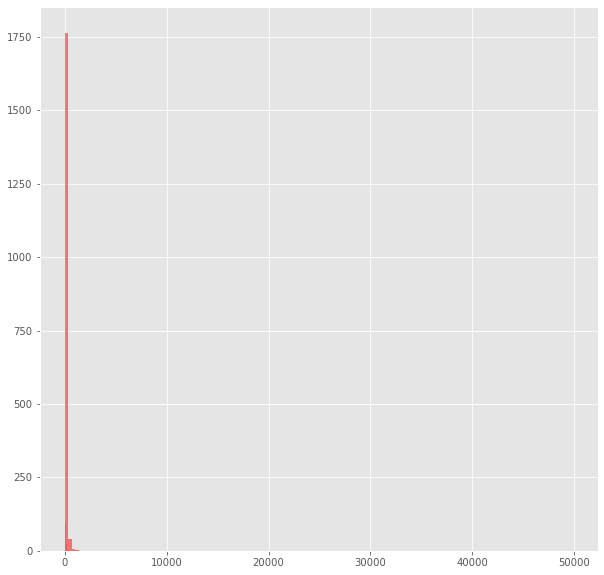

In [50]:
data = new_df
plt.figure(figsize=(10, 10))
control_all = data['sum_gamerounds'][data['version'] == 'gate_30'][data['retention_7'] > data['retention_1']]
test_all = data['sum_gamerounds'][data['version'] == 'gate_40'][data['retention_7'] > data['retention_1']]


plt.hist(control_all, color='r', bins=150, alpha = 0.5)
plt.hist(test_all,  bins=150, alpha = 0.5)


plt.show()

In [51]:
ttest_ind(control_all, test_all, equal_var = False)

Ttest_indResult(statistic=0.9259554883668168, pvalue=0.3545909295787989)

pvalue > 0.05 -> Значимых различий нет

In [52]:
# Проверка на нормальность тест Колмогорова-Смирнова
print(kstest(control_all, 'norm'))
print(kstest(test_all, 'norm'))

KstestResult(statistic=0.9771150384675417, pvalue=0.0)
KstestResult(statistic=0.972573004462701, pvalue=0.0)


pvalue < 0.05 -> Распределение не нормальное

In [53]:
# Расчет стат значимости Манна Уитни
mannwhitneyu(control_all, test_all)

MannwhitneyuResult(statistic=1577582.5, pvalue=0.2613704754581595)

pvalue > 0.05 -> Значимых различий нет

Нулевую гипотезу не отвергаем.